# author: Kevin Rohe
### version: 08/03/22
### Trajectories for two experimental settings and illustration in ternary diagram
Import libraries and settings

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import ternary as ternary
from matplotlib import cm
from IPython.display import display, Markdown

plt.rcParams['font.size'] = 22
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
})
cmap = 'rainbow'

## sympy-part

In [2]:
t,k1,k2,su,sv,F,Yu,Yv,pu,pv = sp.symbols("t k_1 k_2 s_u s_v F Y_u Y_v p_u p_v")#, real=True)
u,v,w = sp.symbols("u v w")#, real=True)

display(Markdown('### defining equation system'))
df = (Yu*F*su*(1-u-v) - k1*u - k2*u*v)
display(Markdown(r"$\frac{{du}}{{dt}}=$ {} $=0$".format(sp.latex(df, mode='inline'))))
dg = ((1-Yu)*F*sv*(1-u-v)**2 - k2*u*v)
display(Markdown(r"$\frac{{dv}}{{dt}}=$ {} $=0$".format(sp.latex(dg, mode='inline'))))

### defining equation system

$\frac{du}{dt}=$ $F Y_{u} s_{u} \left(- u - v + 1\right) - k_{1} u - k_{2} u v$ $=0$

$\frac{dv}{dt}=$ $F s_{v} \left(1 - Y_{u}\right) \left(- u - v + 1\right)^{2} - k_{2} u v$ $=0$

In [3]:
#dictionary with reaction parameter !!! not the most acurate way to do, but well enough
subdict = {su:1,sv:0.11,F:1.37/1.56,k1:1e13*sp.exp(-140000/(500*8.3145)),k2:1e5*sp.exp(-40000/(500*8.3145))}
#lambdify function system and define function
funcs = [sp.lambdify([u,v,Yu], f.subs(subdict)) for f in [df,dg]]

def sim(Y_u, tmax=100.0, dt=2000.0, res=9):
    t = 0
    #either random values for p
#    p = np.random.rand(3,res)
#    p = p/np.sum(p,0)
#    p = p[:2,:]
    #taking a fixed list
    p = np.zeros((2,res))
    p[0,:] = [0,0.95,0.8,0.675,0.625,0.5,0.35,0.2,0.05]
    p[1,1:] = 1-p[0,1:]

    data, time = [], []
    data.append(p)
    time.append(t)
    while t <tmax: #loop for simple integration; doesn't need to be acurate for the figures here
        t = t + 1.0/dt
        p = p + np.asarray([f(p[0,:], p[1,:], Y_u) for f in funcs])/dt
        time.append(t) #try walrus-operator when using python >=3.8
        data.append(p)
    return np.asarray(data), np.asarray(time)

## figure setup, first bistable, second monostable

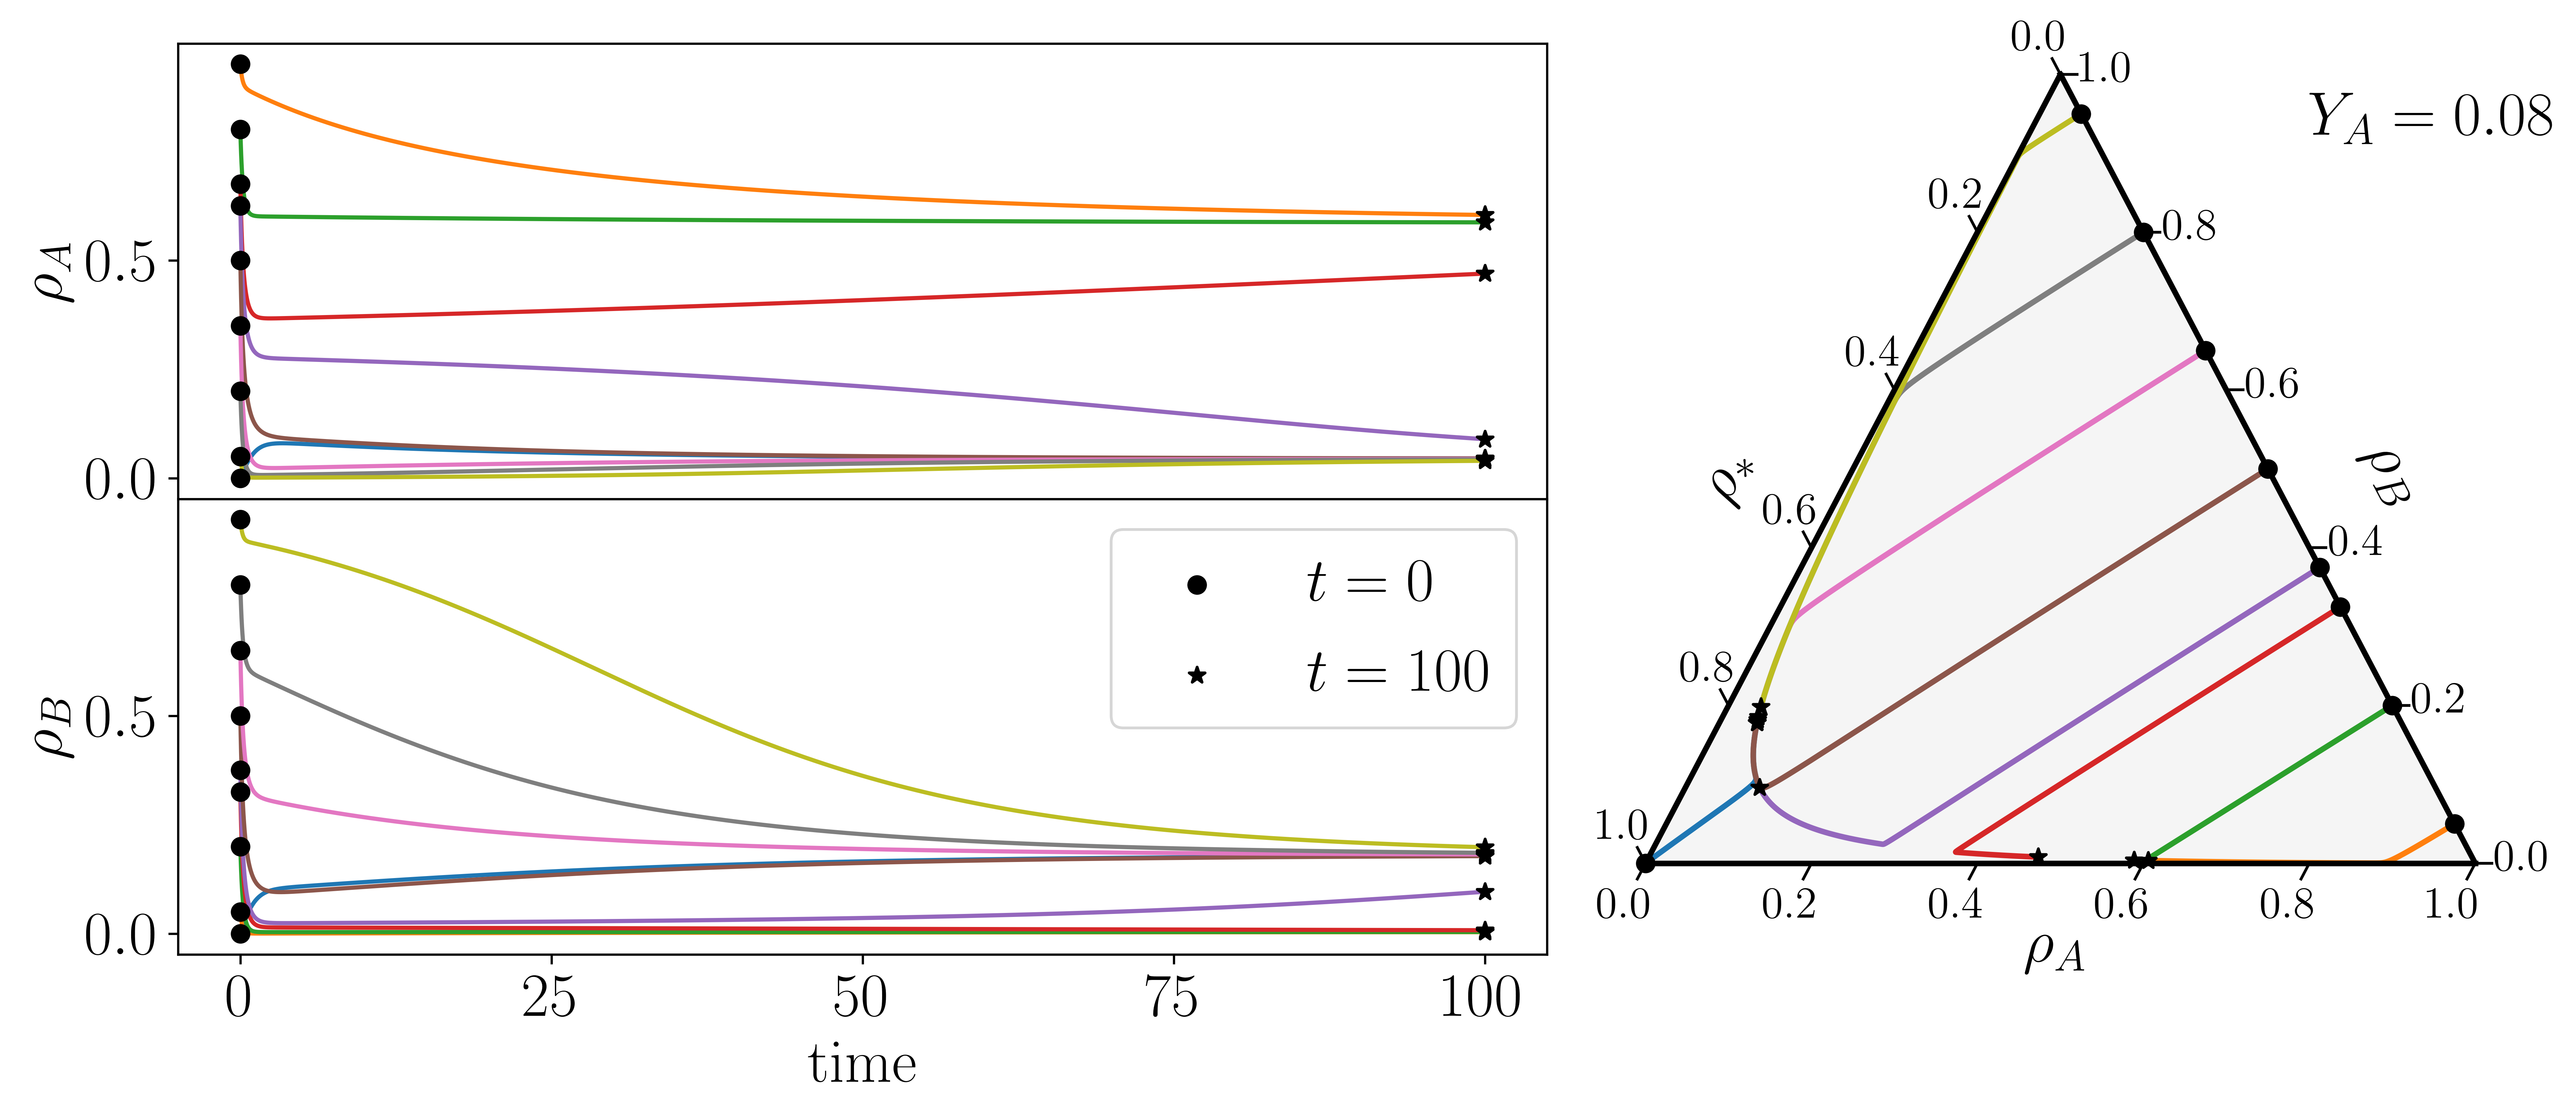

In [5]:
plt.rcParams['font.size'] = 22
Y_u = 80/1000.0
data, time = sim(Y_u)

fig = plt.figure(figsize=(15,6),dpi=600)
#Layout
gs0 = fig.add_gridspec(1, 2,wspace=0.05, hspace=0.05,width_ratios=[3,2])
gs00 = gs0[0,1].subgridspec(1,1)
gs01 = gs0[0,0].subgridspec(2,1,hspace=0.0)
ax1 = fig.add_subplot(gs01[0,0])
ax2 = fig.add_subplot(gs01[1,0], sharey=ax1)
ax3 = fig.add_subplot(gs00[0])
figure, tax = ternary.figure(ax=ax3)
#left plots; time vs rho and scatter for with legend
ax1.plot(time,data[:,0],zorder=1)
ax1.scatter(np.ones_like(data[0,0])*time[0],data[0,0],marker="o",color='k',zorder=2,label="$t=0$")
ax1.scatter(np.ones_like(data[-1,0])*time[-1],data[-1,0],marker="*",color='k',zorder=2,label="$t=100$")
ax2.plot(time,data[:,1],zorder=1)
ax2.scatter(np.ones_like(data[0,1])*time[0],data[0,1],marker="o",color='k',zorder=2,label="$t=0$")
ax2.scatter(np.ones_like(data[-1,1])*time[-1],data[-1,1],marker="*",color='k',zorder=2,label="$t=100$")
#ternary plots, looping through data to get the scatterpoints more convenient
figure, tax = ternary.figure(ax=ax3)
temp1,temp2 = [],[]
for i in range(data.shape[2]):
    tax.plot(data[:,:,i],zorder=1,linewidth=2)#,marker="*",color='black')
    temp1.append(data[0,:,i])
    temp2.append(data[-1,:,i])
tax.scatter(temp1,marker="o",color='black',zorder=2,label="$t=0$")
tax.scatter(temp2,marker="*",color='black',zorder=2,label="$t=100$")

#beautify ternary plot
tax.left_axis_label(r'$\rho_{*}$',offset=0.15)#,fontsize=18)
tax.right_axis_label(r'$\rho_{B}$',offset=0.15)#,fontsize=18)
tax.bottom_axis_label(r'$\rho_{A}$')#,fontsize=18)
tax.ticks(axis='lbr', multiple=0.2, linewidth=1, tick_formats="%.1f", offset=0.02,fontsize=16)
tax.boundary(linewidth=2.0)
tax.get_axes().axis('off')
ax3.text(0.8,0.8,r'$Y_{{A}}={}$'.format(Y_u))#,fontsize=18)
tax._redraw_labels()
#beautify normal plots
ax2.set_xlabel('time')
ax1.set_ylabel(r'$\rho_{A}$')
ax2.set_ylabel(r'$\rho_{B}$')
ax1.set_xticks([])
ax2.set_xticks([0,25,50,75,100])
ax2.legend()
plt.savefig("twosteadystate.pdf", dpi=600, bbox_inches="tight")

## below: complete copy from above, except different Y_u

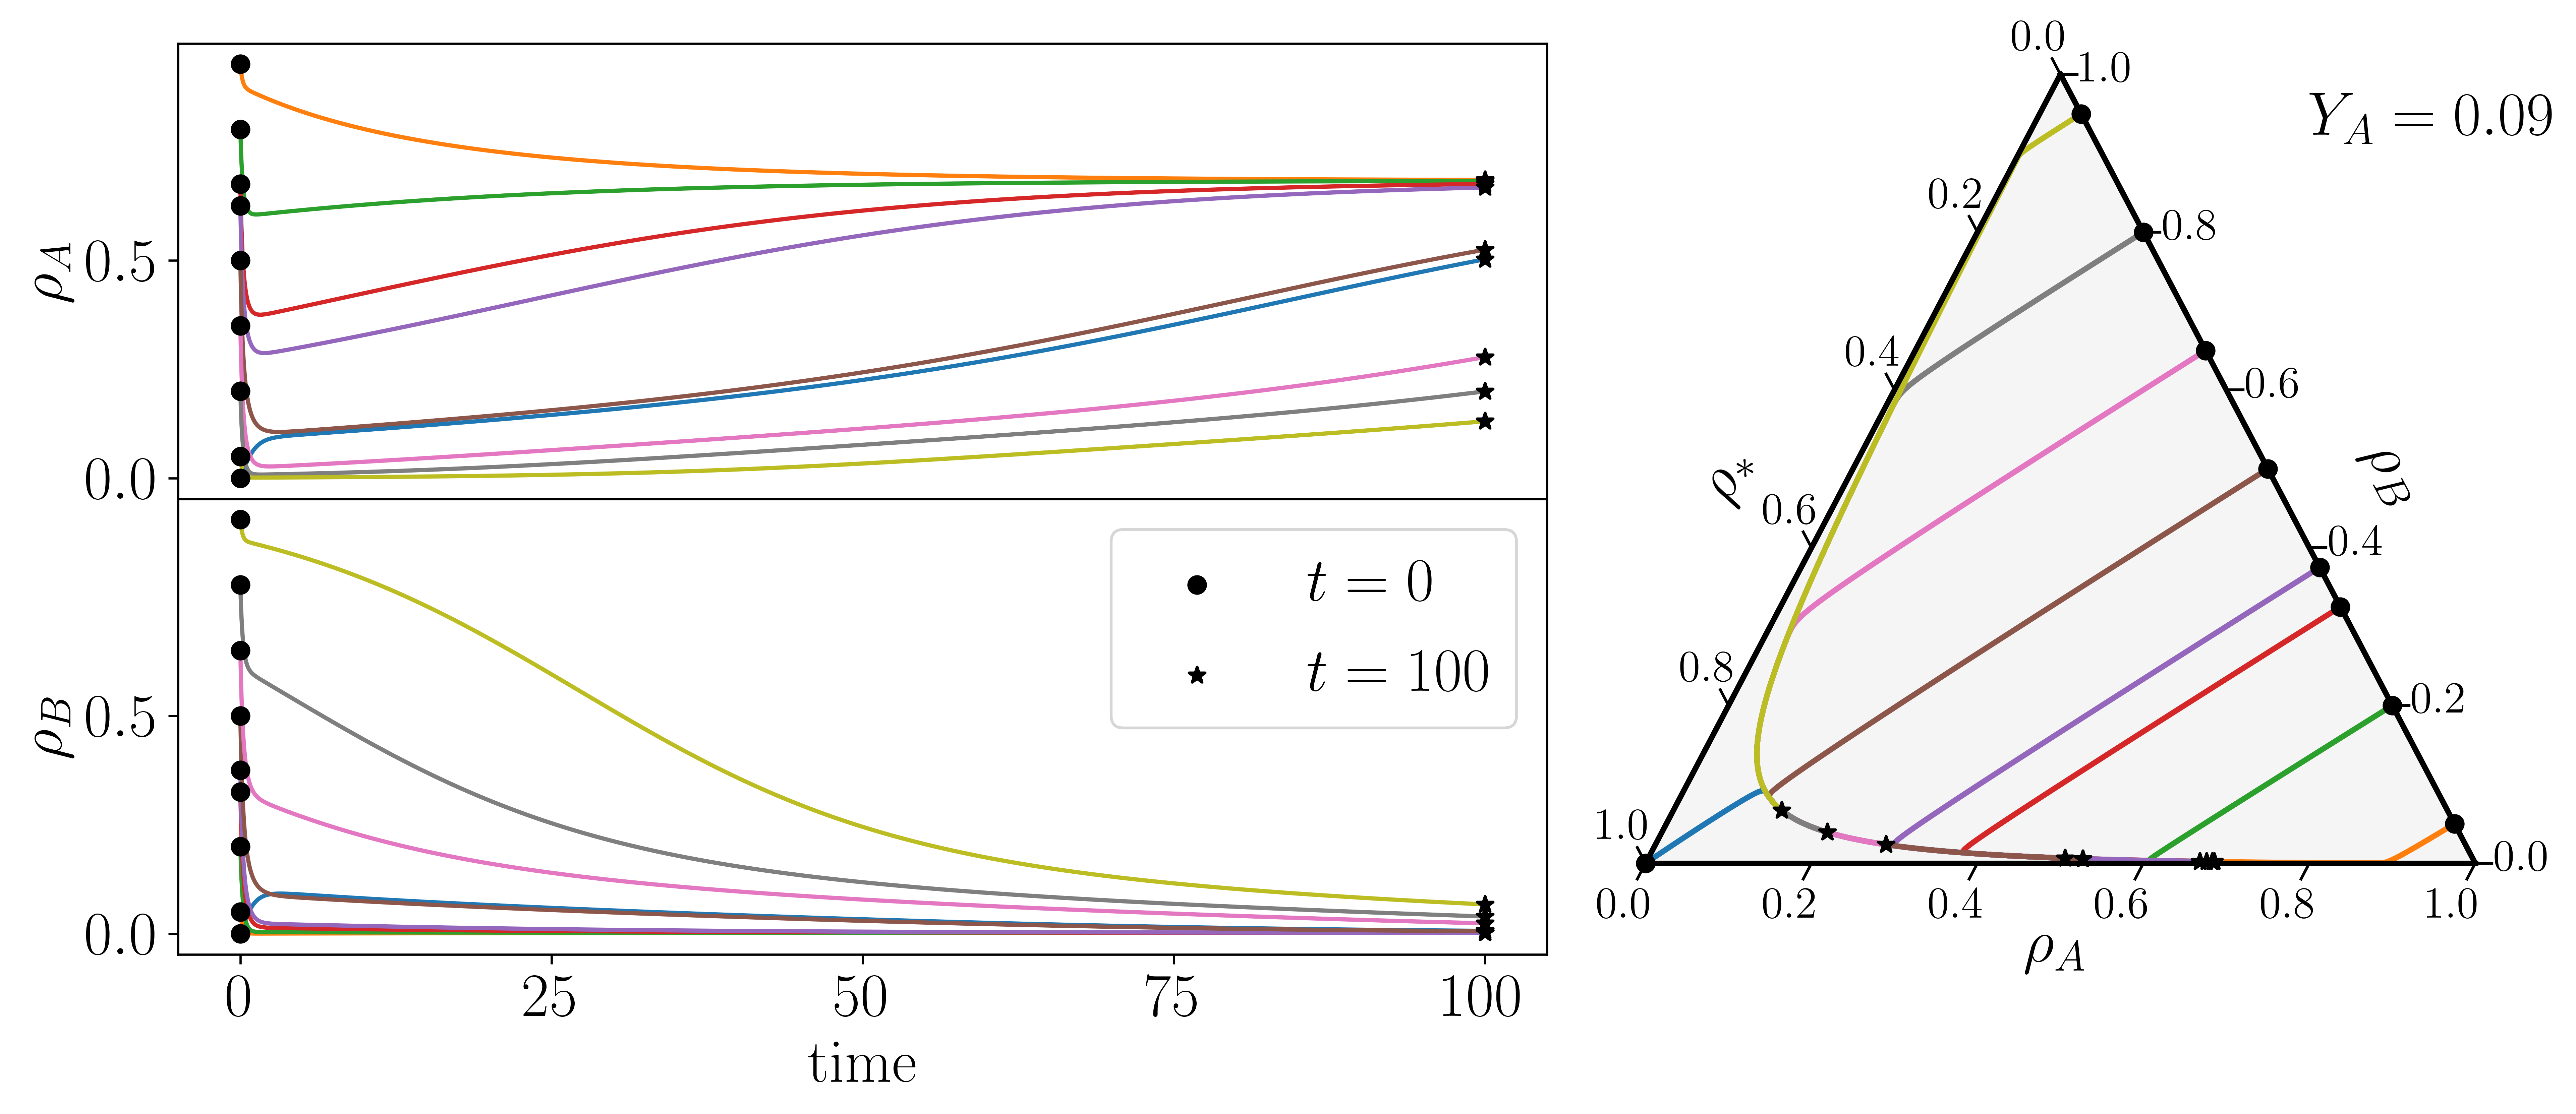

In [6]:
plt.rcParams['font.size'] = 22
Y_u = 90/1000.0
data, time = sim(Y_u)

fig = plt.figure(figsize=(15,6),dpi=600)
#Layout
gs0 = fig.add_gridspec(1, 2,wspace=0.05, hspace=0.05,width_ratios=[3,2])
gs00 = gs0[0,1].subgridspec(1,1)
gs01 = gs0[0,0].subgridspec(2,1,hspace=0.0)
ax1 = fig.add_subplot(gs01[0,0])
ax2 = fig.add_subplot(gs01[1,0], sharey=ax1)
ax3 = fig.add_subplot(gs00[0])
figure, tax = ternary.figure(ax=ax3)
#left plots; time vs rho and scatter for with legend
ax1.plot(time,data[:,0],zorder=1)
ax1.scatter(np.ones_like(data[0,0])*time[0],data[0,0],marker="o",color='k',zorder=2,label="$t=0$")
ax1.scatter(np.ones_like(data[-1,0])*time[-1],data[-1,0],marker="*",color='k',zorder=2,label="$t=100$")
ax2.plot(time,data[:,1],zorder=1)
ax2.scatter(np.ones_like(data[0,1])*time[0],data[0,1],marker="o",color='k',zorder=2,label="$t=0$")
ax2.scatter(np.ones_like(data[-1,1])*time[-1],data[-1,1],marker="*",color='k',zorder=2,label="$t=100$")
#ternary plots, looping through data to get the scatterpoints more convenient
figure, tax = ternary.figure(ax=ax3)
temp1,temp2 = [],[]
for i in range(data.shape[2]):
    tax.plot(data[:,:,i],zorder=1,linewidth=2)#,marker="*",color='black')
    temp1.append(data[0,:,i])
    temp2.append(data[-1,:,i])
tax.scatter(temp1,marker="o",color='black',zorder=2,label="$t=0$")
tax.scatter(temp2,marker="*",color='black',zorder=2,label="$t=100$")

#beautify ternary plot
tax.left_axis_label(r'$\rho_{*}$',offset=0.15)#,fontsize=18)
tax.right_axis_label(r'$\rho_{B}$',offset=0.15)#,fontsize=18)
tax.bottom_axis_label(r'$\rho_{A}$')#,fontsize=18)
tax.ticks(axis='lbr', multiple=0.2, linewidth=1, tick_formats="%.1f", offset=0.02,fontsize=16)
tax.boundary(linewidth=2.0)
tax.get_axes().axis('off')
ax3.text(0.8,0.8,r'$Y_{{A}}={}$'.format(Y_u))#,fontsize=18)
tax._redraw_labels()
#beautify normal plots
ax2.set_xlabel('time')
ax1.set_ylabel(r'$\rho_{A}$')
ax2.set_ylabel(r'$\rho_{B}$')
ax1.set_xticks([])
ax2.set_xticks([0,25,50,75,100])
ax2.legend()
plt.savefig("onesteadystate.pdf", dpi=600, bbox_inches="tight")